# Introduction
The no show appointments dataset was adopted for this exercise, the dataset contains information from 100k medical appointments in Brazilto. I'll be analysing to determine whether or not patients show up for their appointments, the characteristics of patients that do show up and how they differ from those that don't.

# Column names
PatientId - an ID unique to each patient
AppointmentID    - appointment ID assigned to each patient for the appointment session
_The appoinment and patient ID are not very significant for this analysis

Gender - gender
ScheduledDay - this signifies the day the appointment was scheduled
AppointmentDay - date of appointment
Age - age of the patient
Neighbourhood - neighbourhood where the patient lives
Scholarship - whether patient is enrolled in the Brazillian welfare program
Hipertension, Diabetes, Alcoholism, Handcap - these three columns are medical condition(s) of a patient
SMS_received- notification of appointment details to patient
No-show - whether patient showed up for his/her appointment

# Question(s) for Analysis
1. Age distribution of patients
2. What gender is likely to show for an appointment?
3. Does medical condition play a role in patients keeping to appointments?
4. Does recieving sms matter?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
  Running setup.py install for pandas: started
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\bibi\anaconda3\lib\site-packages\pandas-1.4.4.dist-info\
   from C:\Users\BIBI\anaconda3\Lib\site-packages\~andas-1.4.4.dist-info
  Moving to c:\users\bibi\anaconda3\lib\site-packages\pandas\
   from C:\Users\BIBI\anaconda3\Lib\site-packages\~andas


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [909 lines of output]
  C:\Users\BIBI\AppData\Local\Temp\pip-install-jg7x6cth\pandas_4713f31e30b748dbb42651a8ef26be51\setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__init__.py 

# Data Wrangling
I loaded in the dataset for this section and looked at the properties of the dataset to understand better

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Properties

In [3]:
df.shape

(110527, 14)

Data has 14 columns and 110,527 rows. Further insight will be gotten by looking at the data types, info, missing values, incorrect data types, incorrect label names

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

These columns have incorrect data types; PatientId and AppointmentID should be object (quantitative analysis will not be performed on these columns as they are unique to the patient and appointment), ScheduledDay and AppointmnetDay should be datetime datatype.

In [5]:
df.duplicated().sum()

0

There are duplicated values for some columns, however since no rows have duplicated values, these will notbe dropped.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in this dataset

In [8]:
df['Age'].mean()

37.08887421173107

The average age of patients is 37years

### Data Cleaning

Data cleaning will include, renaming the incorrect columns, changing data types, dropping insignificant columns

In [9]:
df=df.rename(columns = {'Handcap' : 'Handicap'})

In [10]:
df=df.rename(columns = {'Hipertension' : 'Hypertension'})

Columns Handcap and Hipertension were renamed to Handicap and Hypertension

In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [12]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

Datatypes have been amended

In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Columns that will not be used for this analysis have been dropped

# Exploratory Data Analysis
Some exploratory analysis will be done before research questions are answered.

In [35]:
def labels (a, b, c):
    """
    Args:
    a (str): x-axis title(weight = "bold")
    b (str): y-axis title(weight = 'bold')
    c (str): main title(weight = 'bold')
    
    
    Returns:
    None
    """
    
    plt.xlabel(a, weight = 'bold')
    plt.ylabel(b, weight = 'bold')
    plt.title(c, fontsize = 14, weight = 'bold')
    plt.show()

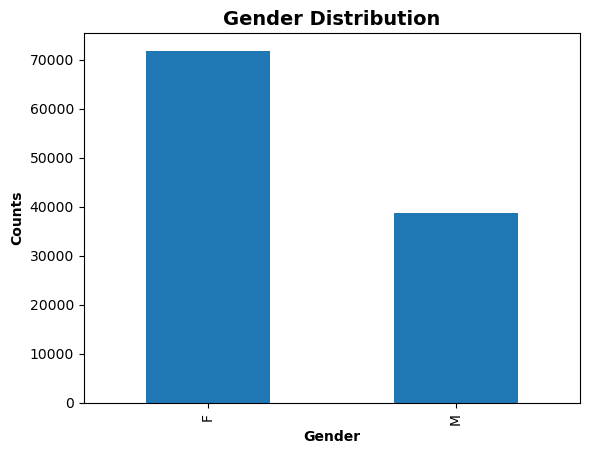

In [36]:
df['Gender'].value_counts().plot(kind= 'bar')
labels('Gender', 'Counts', 'Gender Distribution')

Text(0.5, 1.0, 'Gender Distribution of Patients')

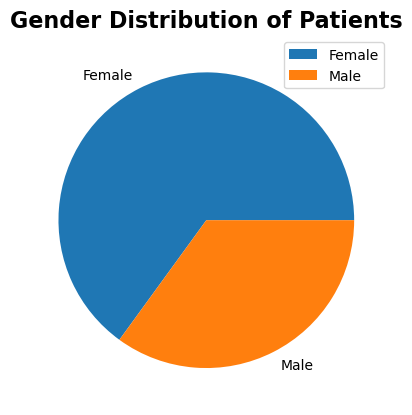

In [31]:
sex = df['Gender'].value_counts()
mylabels = ["Female", "Male"]
plt.pie(sex, labels = mylabels)
plt.legend()
plt.title("Gender Distribution of Patients", fontsize= 16, weight = 'bold')

These two charts(bar and pie) shows the gender distribution of the patients, the number/percentage of female is almost 50% greater than male as proven in the value counts below

In [20]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

This chart and table shows distribution of male and female patients

In [21]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

This shows number of people that came for their appointment versus those that did not.
Note : This column name is No-show, No signifies people that showed up while Yes means people that did not show up.

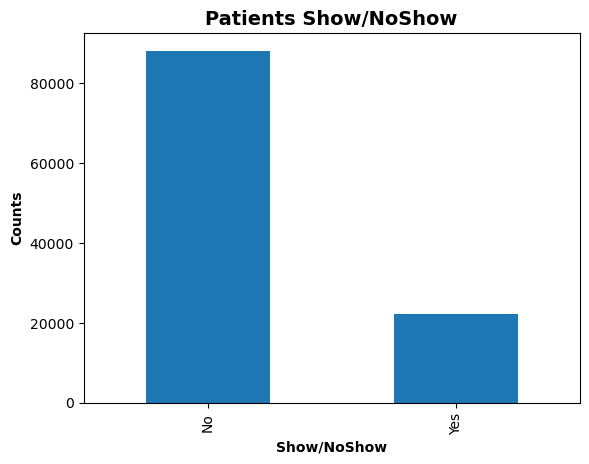

In [37]:
df['No-show'].value_counts().plot(kind ='bar')
labels('Show/NoShow', 'Counts', 'Patients Show/NoShow')

As this chart shows, the difference between those that showed up for their appointment and those that did not is pretty significant.

In [23]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

This shows number of patients that received SMS for their appointment date, impact of this on patients keeping to their appointment date will be explored

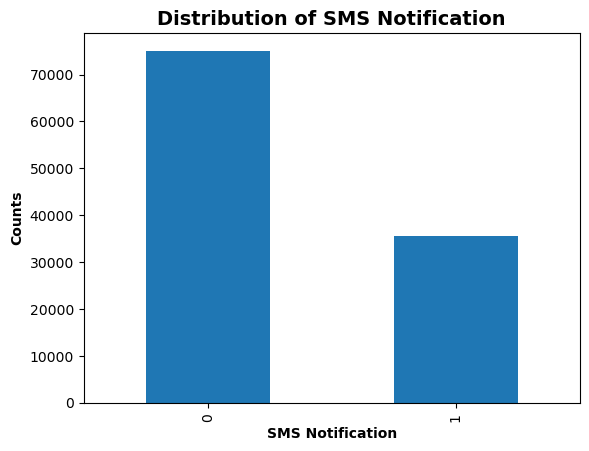

In [38]:
df['SMS_received'].value_counts().plot(kind= 'bar')
labels('SMS Notification', 'Counts', 'Distribution of SMS Notification')

This is a pictorial represantation of patients that received SMS for their appointment date, those that did not ishigherthan those that did.

# Question 1 - Age Distribution of Patients

Average age and age range of patients

Text(0.5, 1.0, 'Age Range of Patients')

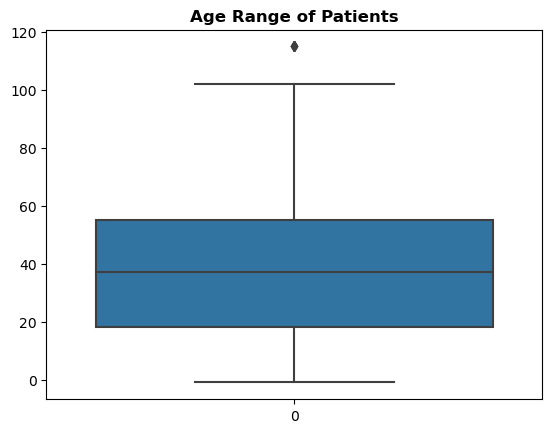

In [41]:
sns.boxplot(df['Age'])
plt.title('Age Range of Patients', weight = 'bold')

This shows the age distribution of the patients, majority of patients are between age 20 - 60

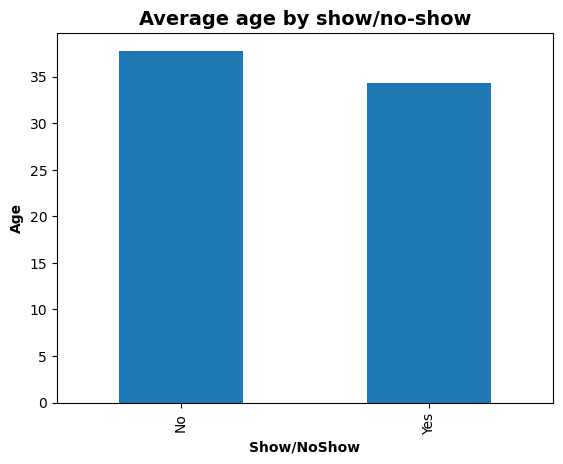

In [39]:
df.groupby('No-show')['Age'].mean().plot(kind = 'bar')
labels('Show/NoShow', 'Age', 'Average age by show/no-show')

This chart shows the average age of patients that showed up for appointments vs thosethat did not. While the averageof both patients seem to be in the same range(mid to late 30s), the number of patients that showed up is slightly higher than those that did not.

In [27]:
df['Neighbourhood'].value_counts()[:10]

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64

This shows the top ten neighbourhoods where the patients reside, there is no data showing the hospital location and travel duration to determine if distance impacts patients availability on appointment day

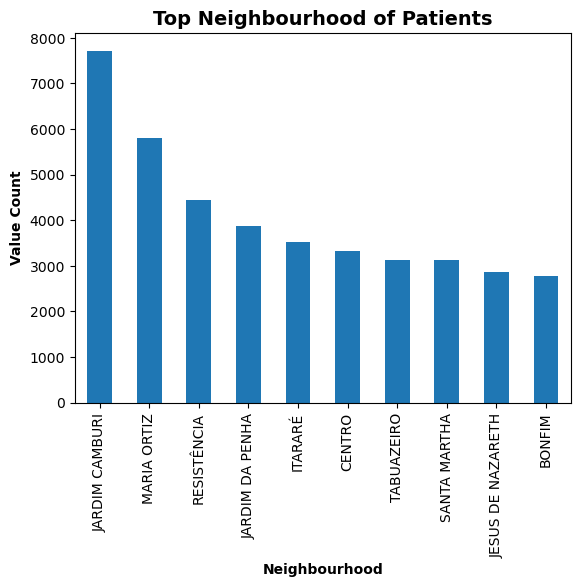

In [40]:
df['Neighbourhood'].value_counts()[:10].plot(kind= 'bar')
labels('Neighbourhood', 'Value Count', 'Top Neighbourhood of Patients')

This is a graphical representation of top neighbourhoods where the patients reside

# Question 2 - What gender is likely to show for an appointment?


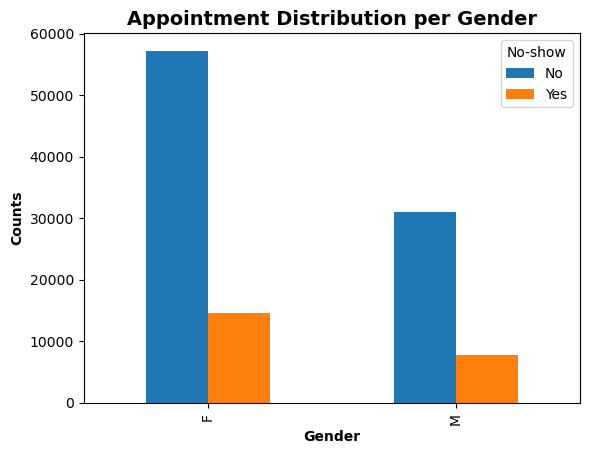

In [41]:
df.groupby(["Gender", 'No-show']).size().unstack(level=1).plot(kind='bar')
labels('Gender', 'Counts', 'Appointment Distribution per Gender')

Keeping to appointment appear not to be based on gender as the number of people that do not show up for appointment appears to be the same for both gender. The number of females is significantly higher the males.

# Question 3 - Does medical condition play a role in patients keeping to appointments?

In [30]:
med_condition = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
dataset = df.groupby('No-show')[med_condition].sum()
print(dataset)

         Hypertension  Diabetes  Alcoholism  Handicap
No-show                                              
No              18029      6513        2683      2006
Yes              3772      1430         677       453


In [31]:
indx = np.arange(len(med_condition))
print(dataset.T)
show_means = list(dataset.T['No'])
No_show_means = list(dataset.T['Yes'])

No-show          No   Yes
Hypertension  18029  3772
Diabetes       6513  1430
Alcoholism     2683   677
Handicap       2006   453


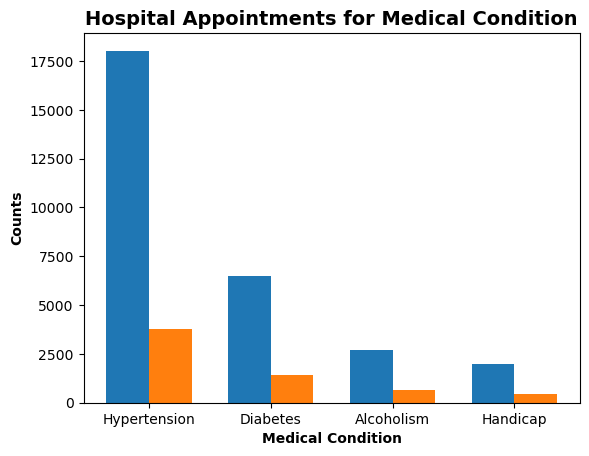

In [42]:
bar_width=0.35
fig, ax = plt.subplots()
barshow = ax.bar(indx - bar_width/2, show_means, bar_width, label='show')
barNo_show = ax.bar(indx + bar_width/2, No_show_means, bar_width, label= 'No show')

ax.set_xticks(indx)
ax.set_xticklabels(med_condition)
labels('Medical Condition', 'Counts', 'Hospital Appointments for Medical Condition')

ax.legend()

plt.show()

Hypertension is the highest with respectto medical condition, however, it can be seen that patients will show up for their appointment based on severity of their illness.

# Question 4 - Does recieving sms matter?

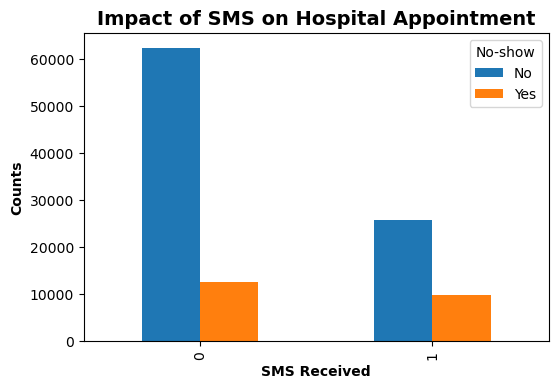

In [43]:
df.groupby(["SMS_received", 'No-show']).size().unstack(level=1).plot(kind='bar', figsize=(6, 4))
labels('SMS Received', 'Counts', 'Impact of SMS on Hospital Appointment')

SMS notification for patients that showed up and those that did not, 0 indicates the patient did not SMS notification, this clearly is not a determinant in patients keeping to time as the chart shows that the number of patients that did not receive SMS notification of their appointments but showed is far greater than those that did.

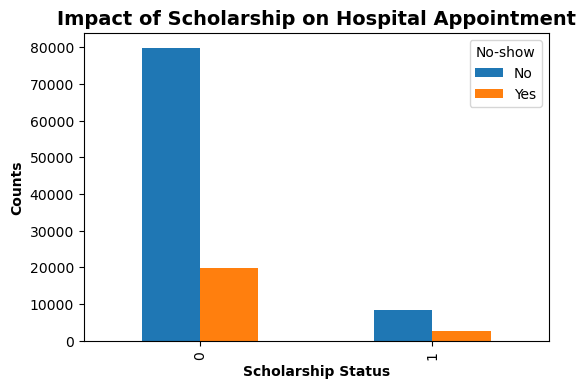

In [44]:
df.groupby(["Scholarship", 'No-show']).size().unstack(level=1).plot(kind='bar', figsize=(6, 4))
labels('Scholarship Status', 'Counts', 'Impact of Scholarship on Hospital Appointment')

Enrollment in the welfare scholarship programme by the Brazillian Government and its significance to patients show/No show for their appointment. Enrolling for the welfare program does not impact a patient showing up for their appointment, this could also be due to the fact that this is not a criteria to stay or drop out of the program.

# Conclusion
Findings:
Analysis was done on the No-show appointments dataset; the No-show column was a constant variable compared to other variables(columns) in the dataset. 
Observations:
1.	There are two sets of patients – those that showed up for appointment and those that did not show up.
2.	The number of patients that showed up was greater than those that did not.
3.	Females are more than males.
4.	Been enrolled in the scholarship program(social welfare program by the Government of Brazil) does not have impact on patients keeping to appointments.
More details on the welfare can be found on this link Bolsa Familia
5.	SMS notification does not appear to determine whether a patient showed up or not.
6.	Age distribution varies with an average of 37 for both sets of patients.
7.	Medical condition appears to have the greatest impact on patients with severity of the illness determining those that keep to appointment, Hypertensive patients have the highest number.
8.	There happens to be location spread among patients, however, there is no data showing the hospital location and travel duration to determine if distance impacts patients availability on appointment day.


LIMITATION
There is no data showing the hospital location and travel duration to determine if patients location impacts patients availability on appointment day.


References:
website: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/amp/amp, https://matplotlib.org/, Youtube.
